In [2]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import json 
from matplotlib.backends.backend_pdf import PdfPages
from matplotlib.ticker import FuncFormatter
colors = [
    '#2e588c', #blue
    '#5d9648', #green
    '#e8a13c', #orange
    '#bc2c30', #red
    '#000000',
    '#000000'  #black
]
# These are the "Tableau 20" colors as RGB.    
tableau20 = [(31, 119, 180), (174, 199, 232), (255, 127, 14), (255, 187, 120),    
             (44, 160, 44), (152, 223, 138), (214, 39, 40), (255, 152, 150),    
             (148, 103, 189), (197, 176, 213), (140, 86, 75), (196, 156, 148),    
             (227, 119, 194), (247, 182, 210), (127, 127, 127), (199, 199, 199),    
             (188, 189, 34), (219, 219, 141), (23, 190, 207), (158, 218, 229)]    
  
# Scale the RGB values to the [0, 1] range, which is the format matplotlib accepts.    
for i in range(len(tableau20)):
    r, g, b = tableau20[i]    
    tableau20[i] = (r / 255., g / 255., b / 255.)

def labeller(x, pos):
    """
    x is the tick value, pos is the position. These args are needed by 
    FuncFormatter.
    """

    if x < 1:
        return '0.'+'0'*(abs(int(np.log10(x)))-1)+\
                format(x/10**(np.floor(np.log10(x))),'.0f')
    else:
        return format(x,'.0f')

custom_formatter = FuncFormatter(labeller)

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

df = pd.read_excel("https://github.com/chris1610/pbpython/blob/master/data/sample-salesv3.xlsx?raw=true")
df.head()
top_10 = (df.groupby('name')['ext price', 'quantity'].agg({'ext price': 'sum', 'quantity': 'count'})
          .sort_values(by='ext price', ascending=False))[:10].reset_index()
top_10.rename(columns={'name': 'Name', 'ext price': 'Sales', 'quantity': 'Purchases'}, inplace=True)

In [11]:
plt.style.available



[u'seaborn-darkgrid',
 u'seaborn-notebook',
 u'classic',
 u'seaborn-ticks',
 u'grayscale',
 u'bmh',
 u'seaborn-talk',
 u'dark_background',
 u'ggplot',
 u'fivethirtyeight',
 u'_classic_test',
 u'seaborn-colorblind',
 u'seaborn-deep',
 u'seaborn-whitegrid',
 u'seaborn-bright',
 u'seaborn-poster',
 u'seaborn-muted',
 u'seaborn-paper',
 u'seaborn-white',
 u'seaborn-pastel',
 u'seaborn-dark',
 u'seaborn',
 u'seaborn-dark-palette']

In [12]:
plt.style.use('ggplot')

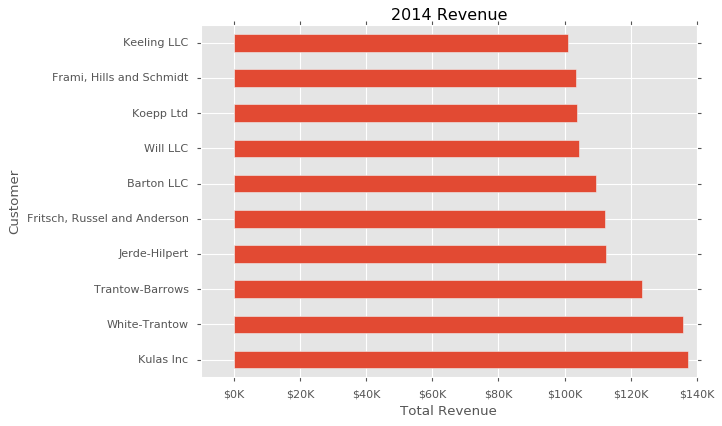

In [24]:
def currency(x, pos):
    'The two args are the value and tick position'
    if x >= 1000000:
        return '${:1.1f}M'.format(x*1e-6)
    return '${:1.0f}K'.format(x*1e-3)

fig, ax = plt.subplots()
top_10.plot(kind='barh', y="Sales", x="Name", ax=ax)
ax.set_xlim([-10000, 140000])
ax.set(title='2014 Revenue', xlabel='Total Revenue', ylabel='Customer')
formatter = FuncFormatter(currency)
ax.xaxis.set_major_formatter(formatter)
ax.legend().set_visible(False)